In [2]:
using Distributions
using Plots
using StatsBase
using Turing

using Distributions
using Plots
using StatsBase

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1242
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242
┌ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1242


  Building Libtask → `/opt/julia/packages/Libtask/RjRkK/deps/build.log`


  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



In [8]:
##############################################
# prioir x likelihood = posterior
##############################################

success=6

tosses=9

# Create a distribution with n = 9 (e.g. tosses) and p = 0.5.

d = Binomial(tosses, 0.5)
pdf(d, success)

0.1640625000000001

In [11]:
# define grid
grid_points = 100
p_grid =  range(0, stop = 1, length = grid_points)

# compute likelihood at each point in the grid
likelihood = [pdf(Binomial(tosses, p), success) for p in p_grid]
plot(p_grid, likelihood, title = "Initial likelihood")

# define prior
prior = ones(length(p_grid));

# As Uniform prior has been used, unstandardized posterior is equal to likelihood

# compute product of likelihood and prior
posterior = likelihood .* prior;

function computePosterior(likelihood, prior)
   
    # compute product of likelihood and prior
    unstd_posterior = likelihood .* prior

    # standardize posterior
    posterior = unstd_posterior / sum(unstd_posterior)
    
    p1 = plot(p_grid, prior, title = "Prior")
    p2 = plot(p_grid, likelihood , title = "Likelihood")
    p3 = plot(p_grid, posterior, title = "Posterior")
    
    plot(p1, p2, p3, layout=(1, 3), label="")

end


computePosterior (generic function with 1 method)

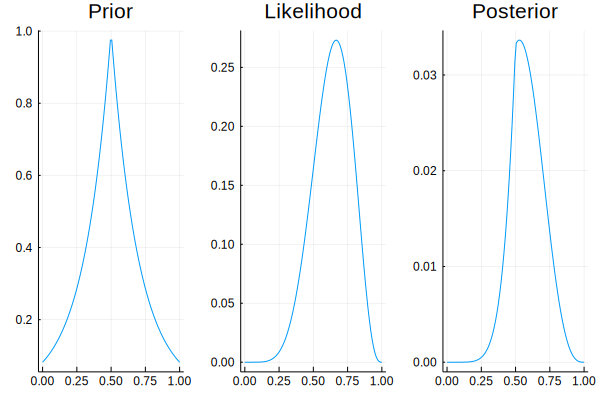

In [6]:
prior1 = ones(length(p_grid))
posterior1 = computePosterior(likelihood, prior1)

#prior2 = 2 * (p_grid .>= 0.5)
prior2 = 0.5 * (p_grid .>= 0.5)
posterior2 = computePosterior(likelihood, prior2)

prior3 = exp.(-5 * abs.(p_grid .- 0.5))
posterior3 = computePosterior(likelihood, prior3)

In [14]:
##############################################
# the Monte Carlo method - compute pi
##############################################

# Wether we are within or outside the disk
# that has center (0,0) and radius 0
function in_circle(x, y, r)
    sqrt(x^2 + y^2) <= r
end

in_circle (generic function with 1 method)

In [15]:
function approx_pi(r, n)
    
    xs, ys, cols = [], [], []
    
    count = 0
    #sample a lot of points sampled uniformly on the unit square
    # they either fall inside the quarter of disk or outside
    for i in range(1, step=1, stop=n)
        x = rand(Uniform(0,1))
        y = rand(Uniform(0,1))
        append!(xs, x)
        append!(ys, y)

        if in_circle(x, y, r)
            count += 1
            cols = vcat(cols, :red)
        else
            cols = vcat(cols, :steelblue)
        end
    end

    # quarter disk area is pi/4
    # quarter square area is 1
    # ratio of disk area/square are = pi/4
    pi_appr = round(4 * count/n, digits = 3)
    
    pl = scatter(xs, 
        ys, 
        color=cols, 
        size=(200,200),
        legend = false,
        xticks = false,
        yticks = false,
        framestyle = :box,
        title = "pi (approximately) = " * string(pi_appr),
        titlefontsize=font(7, "Calibri"))
    
    display(pl)
    
end

approx_pi (generic function with 1 method)

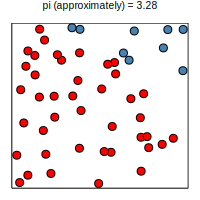

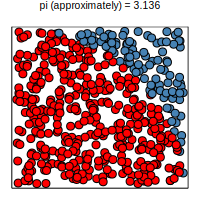

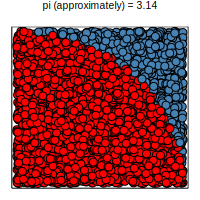

In [16]:
r = 1
n = 100

for n in 5 * 10 .^[1, 2, 3]
    approx_pi(r, n)
end

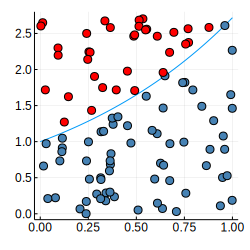

In [17]:
##############################################
# the Monte Carlo method - integration
##############################################
exp(1) - exp(0)
x = range(0, stop = 1, length = 100)
plot(x, exp.(x), size= [200,200], legend= false)

pts =  rand(Uniform(0,1), (100, 2)) # sample uniformly in the square
pts[:, 2] *= exp(1)

cols = fill(:steelblue, 100)

for i in range(1, step=1, stop=100)
    if pts[i,2] > exp(pts[i,1])     # acceptance / rejection step
        cols[i] = :red
    end
end

scatter!(pts[:, 1], pts[:, 2], color = cols, size=[250, 250], legend = false, xlim = [0,1], ylim = [0, exp(1)])

In [18]:
# Monte Carlo approximation

for n in 10 .^[1, 2, 3, 4, 5, 6, 7, 8]
    pts =  rand(Uniform(0,1), (n, 2))
    pts[:, 2] *= exp(1)
    count = sum(pts[:, 2] .< exp.(pts[:, 1]))
    volume = exp(1) * 1 # volume of region
    sol = (volume * count)/n    
    println(sol)
end

2.174625462767236
1.8212488250675603
1.7179541155861167
1.7206723974145757
1.7199384613208915
1.7168776759820465
1.7186959346971031
1.718265168575747


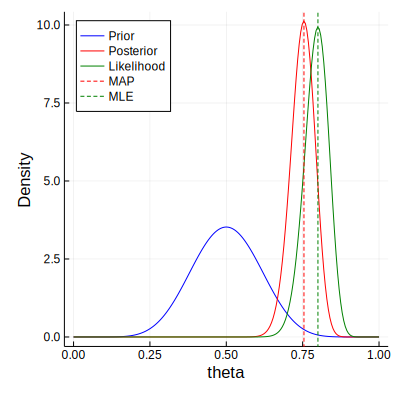

In [20]:
##############################################
# coin tossing
##############################################

n = 4
h = 3
p = h/n

a, b = 10, 10                   # hyperparameters
prior = Beta(a, b)              # prior
post = Beta(h+a, n-h+b)         # posterior

function beta_binomial(n, h, a, b)
    # frequentist
    p = h/n
    mu = mean(Binomial(n, p))
    
    # Bayesian
    thetas = range(0, stop=1, length=200)
    prior = pdf.(Beta(a, b), thetas)

    post = pdf.(Beta(h+a, n-h+b), thetas)
    
    likelihood = n * [pdf(Binomial(n, p), h) for p in thetas];
    plot(thetas, 
         prior, 
         size= [400, 400], 
         label = "Prior",
         color = :blue,
         xlim = [0, 1],
         xlabel = "theta",
         ylabel = "Density")
    plot!(thetas, post, label = "Posterior", color = :red)
    plot!(thetas, likelihood, label="Likelihood", color = :green, legend = :topleft)
    vline!([(h+a-1)/(n+a+b-2)], color = :red, linestyle = :dash, label="MAP")
    vline!([mu / n], color = :green, linestyle = :dash, label="MLE")
 
end

beta_binomial(100, 80, 10, 10)
#beta_binomial(4, 3, 10, 10)
#beta_binomial(4, 3, 2, 2)
#beta_binomial(4, 3, 1, 1)

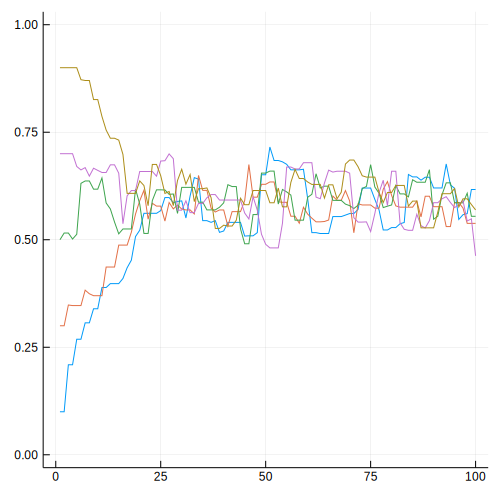

Portion of accepted steps = 0.189


In [21]:
##############################################
# Metropolis-Hastings
# One strategy called burn-in consist in just
# dropping  the first steps (where we are
# supposedly far from the target distribution)
#
# Another strategy consist in doing thinning
# where we only keep 1 value every 2 or 3
# but it is not clear if the estimate is going
# to be better
##############################################

function target(likelihood, prior, n, h, theta)
    if (theta < 0 ||  theta > 1)
        return 0
    else
        return (pdf(likelihood(n, theta), h) * pdf(prior, theta))
    end
end

# experiment: number of toss n, and number of heads h
n = 100
h = 61
# parameter of the prior
a = 10
b = 10
likelihood = Binomial
prior = Beta(a, b)
# sigma of the gaussian for the next hop in the mcmc
sigma = 0.3

# In Metropolis-Hastings, we accept next step with prob p as p = prob(proposal)/prob(previous)
naccept = 0
theta = 0.1
niters = 10000

samples = zeros(niters+1)
samples[1] = theta


for i=1:niters
    theta_p = theta + rand(Normal(0, sigma))
    rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
    u = rand(Uniform(0,1))
    if u < rho
            naccept += 1
            theta = theta_p
    end
    samples[i+1] = theta
end


println("Portion of accepted steps = " * string(naccept/niters))

nmcmc = Int(round(length(samples)/2))

post = Beta(h+a, n-h+b)
thetas = range(0, stop=1, length=200)

histogram(samples[nmcmc:length(samples)] ,
          size = [500, 300],
    
          label="Distribution of posterior samples", alpha = 0.5,
          legend = :topleft)
histogram!(rand(prior, nmcmc), 
          label = "Distribution of prior samples", alpha = 0.5)
plot!(thetas, 50*[pdf(post, theta) for theta in thetas], color = :red, label = "True posterior")

function mh_coin(niters, n, h, theta, likelihood, prior, sigma)
    
    samples = [theta]
    while length(samples) < niters
        theta_p = theta + rand(Normal(0, sigma))
        rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
        u = rand(Uniform(0,1))
        if u < rho
            theta = theta_p
        end
        append!(samples, theta)
    end
    
    return samples

end

n = 100
h = 61
lik = Binomial
prior = Beta(a, b)
sigma = 0.05
niters = 100

chains = [mh_coin(niters, n, h, theta, lik, prior, sigma) for theta in range(0.1, stop=1, step=0.2)];

p = plot(chains[1], size= [500, 500], legend =:false, xlim = [0, niters], ylim = [0, 1])
for i in 2:length(chains)
    plot!(chains[i])
end
display(p)

In [29]:
##############################################
# Turing
##############################################

using Turing

@model mod(y) = begin
    # model definition
end

n = 100    # number of trials
h = 61     # number of successes

niter = 10000

@model coin(n, h) = begin
    
    # prior
    p ~ Beta(2, 2)
    
    # likelihood
    h ~ Binomial(n, p)
    
end

# chain = sample ( which model, which sampling algorithm )
ch = sample(coin(n,h), NUTS(niter, 0.65 #nuts=no u-turn sampler

show(ch)

# read samples into array
p = convert(Array{Float64}, ch[:p].value.data[:,:,1][:,1]);

histogram(p, size = [300, 300], legend = false, title = "posterior density")

# traceplot 
plot(p, size = [300, 300], legend = false, title = "traceplot")

function plot_par(par)
    p1 = histogram(par, size = [400, 300], legend = false, title = "posterior density")
    p2 = plot(par, title = "traceplot")
    plot(p1, p2, layout=(1, 2), label="")
end

plot_par(p)

┌ Warning: Model definition seems empty, still continue.
└ @ Turing.Core /opt/julia/packages/Turing/eIa7P/src/core/compiler.jl:494


LoadError: syntax: missing comma or ) in argument list

In [ ]:
#r_hat is a diagnostic value. It is computed by comparing within chain correlation
# take one chain and cut it in 4, if stationary, there should be high autocorrelation
# on the other side, take 4 different chains, and compare the autocorrelation

#ess is effectif number of steps

┌ Info: Found initial step size
│   init_ϵ = 0.8
└ @ Turing.Inference /opt/julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.3, state.ϵ=2.6482151012326165), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=2.65)
│   h.metric = DiagEuclideanMetric([0.09535694384111083, 0.078 ...])
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:145
┌ Info: Finished 20000 sampling steps in 0.917263527 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.09535694384111083, 0.078 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=2.65), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 19064.766107226125
│   average_acceptance_rate = 0.05207695549708949
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:157


Object of type Chains, with data of type 19000×13×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:19000
Thinning interval = 1
Chains            = 1
Samples per chain = 19000
internals         = acceptance_rate, eval_num, hamiltonian_energy, is_accept, log_density, lp, n_steps, numerical_error, step_size, tree_depth
parameters        = alpha_hyp, beta_hyp, p

2-element Array{ChainDataFrame,1}

Summary Statistics

│ Row │ parameters │ mean     │ std       │ naive_se    │ mcse       │ ess     │ r_hat    │
│     │ Symbol     │ Float64  │ Float64   │ Float64     │ Float64    │ Any     │ Any      │
├─────┼────────────┼──────────┼───────────┼─────────────┼────────────┼─────────┼──────────┤
│ 1   │ alpha_hyp  │ 0.234045 │ 0.0841797 │ 0.000610704 │ 0.0024968  │ 980.693 │ 0.999947 │
│ 2   │ beta_hyp   │ 0.233849 │ 0.081397  │ 0.000590516 │ 0.00245019 │ 1081.92 │ 1.00015  │
│ 3   │ p          │ 0.607288 │ 0.049393  │ 0.000358335 │ 0.0014994  │ 1057.26 │ 0.999949 

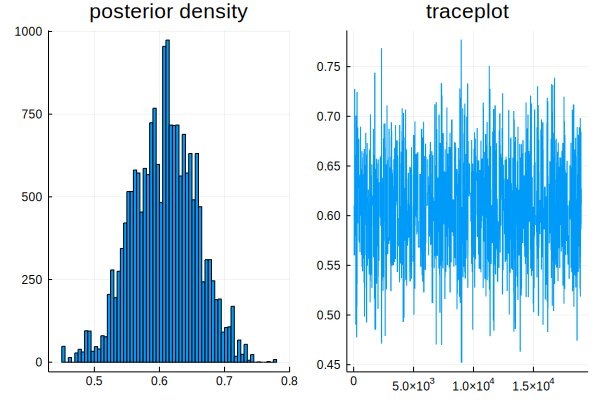

In [25]:
##############################################
# hierarchical models
#
# Some parameters might actually be sharing
# parameters togethers.
# For instance, instead of defining the beta
# distribution parameters to define the 
# rather strong prior. One can decide to make
# the prior parameters to depend on another
# distribution.
# In this case, the beta distribution parameters
# depends on an InverseGamma distribution
##############################################

# remember, a model always ingest data
@model coin_hier(n, h) = begin
    
    # hyperparameters    
    alpha_hyp ~ InverseGamma(10, 2)
    beta_hyp ~ InverseGamma(10, 2)
    
    # prior
    p ~ Beta(alpha_hyp, beta_hyp)
    
    # likelihood
    h ~ Binomial(n, p)
    
end

niter = 20000

ch = sample(coin_hier(n,h), NUTS(niter, 0.30));

show(ch)

# read samples into array
p = convert(Array{Float64}, ch[:p].value.data[:,:,1][:,1]);
plot_par(p)

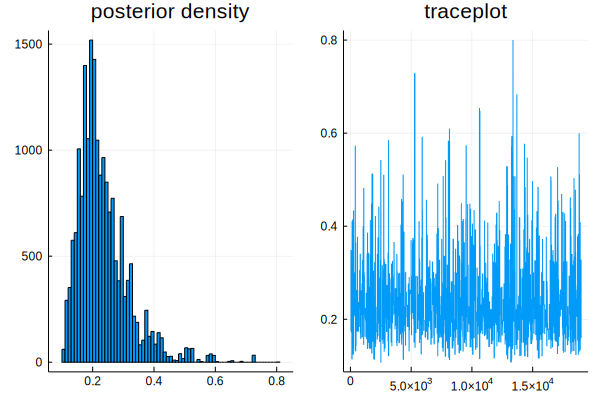

In [26]:
alpha_hyp = convert(Array{Float64}, ch[:alpha_hyp].value.data[:,:,1][:,1]);
plot_par(alpha_hyp)

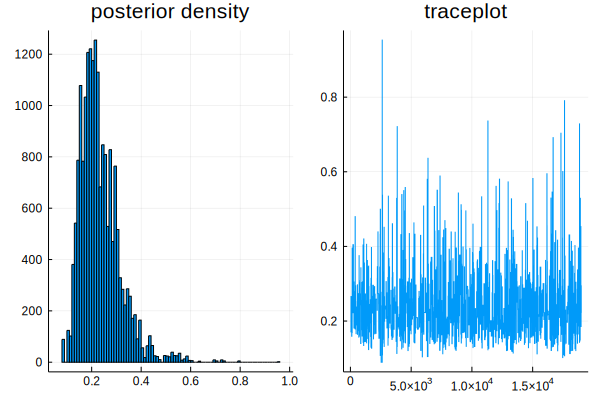

In [27]:
beta_hyp = convert(Array{Float64}, ch[:beta_hyp].value.data[:,:,1][:,1]);
plot_par(beta_hyp)

┌ Info: Found initial step size
│   init_ϵ = 0.025
└ @ Turing.Inference /opt/julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=1.9778039541889068), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=1.98)
│   h.metric = DiagEuclideanMetric([0.00043672575456437925])
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:145
┌ Info: Finished 10000 sampling steps in 2.122854215 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.00043672575456437925]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=1.98), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 6190.27811620198
│   average_acceptance_rate = 0.5861194696554501
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:157


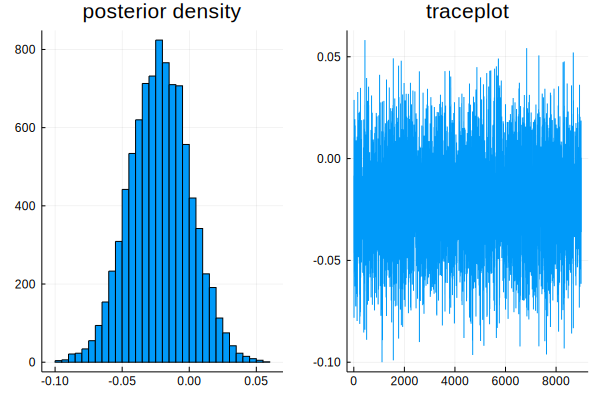

In [32]:
##############################################
# normal distribution
##############################################

N = 2000
y = rand(Normal(0,1), N)
histogram(y, size = [300, 300], legend = false)

@model norm_mu(y) = begin
    
    sigma = 1
    
    # prior
    mu ~ Normal(0,0.5)
    
    # likelihood    
    for i in eachindex(y)
        y[i] ~  Normal(mu, sigma)
   end
    
end

ch = sample(norm_mu(y), NUTS(niter, 0.65));
mu = ch[:mu].value.data[:,:,1]
plot_par(mu)

In [33]:
# Now try to run more than one chain
num_chains = 4
chains = mapreduce(c -> sample(norm_mu(y), NUTS(niter, 0.65)), chainscat, 1:num_chains)

mu = chains[:mu].value.data
plot(mu[:,:,1], label ="chain 1")
plot!(mu[:,:,2], label ="chain 2")
plot!(mu[:,:,3], label ="chain 3")
plot!(mu[:,:,4], label ="chain 4")

histogram(mu[:,:,1], alpha = 0.5, label = "chain 1")
histogram!(mu[:,:,2], alpha = 0.5, label = "chain 2")
histogram!(mu[:,:,3], alpha = 0.5, label = "chain 3")
histogram!(mu[:,:,4], alpha = 0.5, label = "chain 4")

@model norm_mu_sigma(y) = begin
        
    # priors
    mu ~ Normal(0,0.5)
    sigma ~ InverseGamma(2, 3)
    
    # likelihood    
    for i in eachindex(y)
        y[i] ~  Normal(mu, sigma)
   end
    
end

ch = sample(norm_mu_sigma(y), NUTS(niter, 0.65));
show(ch)

┌ Info: Found initial step size
│   init_ϵ = 0.025
└ @ Turing.Inference /opt/julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=1.7985005437245516), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=1.8)
│   h.metric = DiagEuclideanMetric([0.00039314939361313956])
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:145
┌ Info: Finished 10000 sampling steps in 1.822845993 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.00039314939361313956]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=1.8), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 5735.853910821814
│   average_acceptance_rate = 0.7122091708995009
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:157
┌ Info: Found initial step size
│   init_ϵ = 0.025
└ @ Turing.Inference /opt/julia/packages/Tu

Object of type Chains, with data of type 9000×12×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:9000
Thinning interval = 1
Chains            = 1
Samples per chain = 9000
internals         = acceptance_rate, eval_num, hamiltonian_energy, is_accept, log_density, lp, n_steps, numerical_error, step_size, tree_depth
parameters        = mu, sigma

2-element Array{ChainDataFrame,1}

Summary Statistics

│ Row │ parameters │ mean       │ std       │ naive_se    │ mcse        │ ess     │ r_hat    │
│     │ Symbol     │ Float64    │ Float64   │ Float64     │ Float64     │ Any     │ Any      │
├─────┼────────────┼────────────┼───────────┼─────────────┼─────────────┼─────────┼──────────┤
│ 1   │ mu         │ -0.0219865 │ 0.0222198 │ 0.000234218 │ 0.000218459 │ 9395.69 │ 0.999904 │
│ 2   │ sigma      │ 1.00042    │ 0.016028  │ 0.00016895  │ 0.000159893 │ 9122.76 │ 0.999984 │

Quantiles

│ Row │ parameters │ 2.5%       │ 25.0%      │ 50.0%      │ 75.0%       │ 97.5%

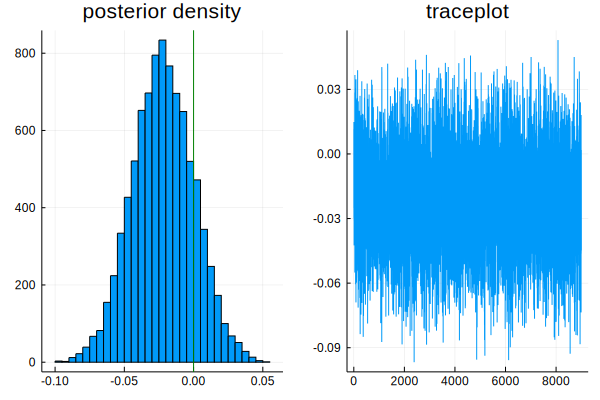

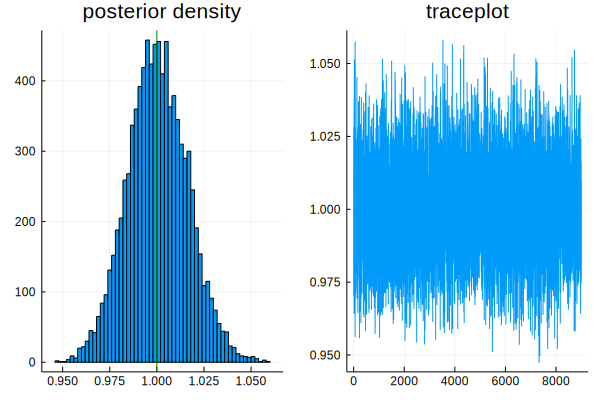

In [34]:
mu = ch[:mu].value.data[:,:,1]
sigma = ch[:sigma].value.data[:,:,1]
pl_mu = plot_par(mu)
# show frequentist mle
vline!([0], color = :green, label="MLE")
pl_sigma = plot_par(sigma)
# show frequentist mle
vline!([1], color = :green, label="MLE")
display(pl_mu)
display(pl_sigma)

┌ Info: Found initial step size
│   init_ϵ = 0.2
└ @ Turing.Inference /opt/julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 1000 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=1000, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=0.44665011709812785), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=0.447)
│   h.metric = DiagEuclideanMetric([0.10104112752535871, 0.035 ...])
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:145


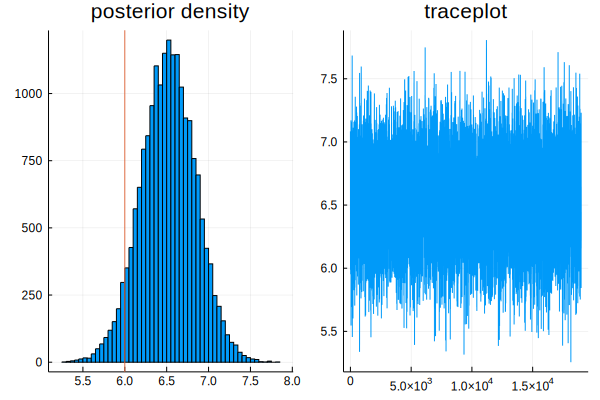

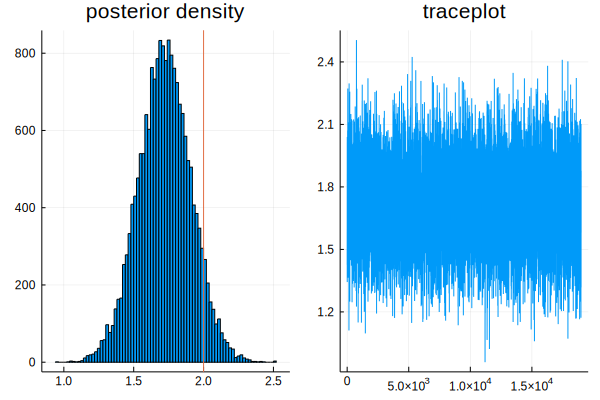

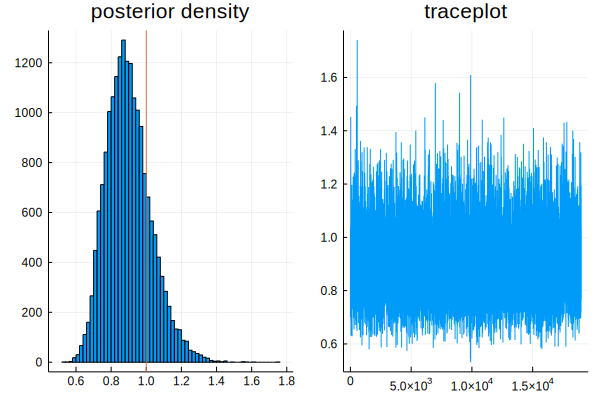

┌ Info: Finished 20000 sampling steps in 5.409440316 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.10104112752535871, 0.035 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=0.447), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 4123.415139409973
│   average_acceptance_rate = 0.8751406462309855
└ @ AdvancedHMC /opt/julia/packages/AdvancedHMC/PQWco/src/sampler.jl:157


In [37]:
##############################################
# linear regression
##############################################

n = 100
a_true = 6
b_true = 2
x = range(0, stop=1, length = n)
x = convert(Array, x)
y = a_true*x .+ b_true + rand(Normal(0,1), n);

plot(x, a_true*x .+ b_true, legend = false, size = [350, 350], color = :blue)
scatter!(x, y)

@model lin_reg(x, y) = begin
  
  a ~ Normal(0, 10)
  b ~ Normal(0, 10)
  # very simple deterministic linear model
  lp = a * x .+ b
    
  s ~ InverseGamma(2, 3)
    
  for i in eachindex(y)
    y[i] ~ Normal(lp[i], sqrt(s))
  end
end

niter = 20000
ch = sample(lin_reg(x, y), NUTS(niter, 0.65));

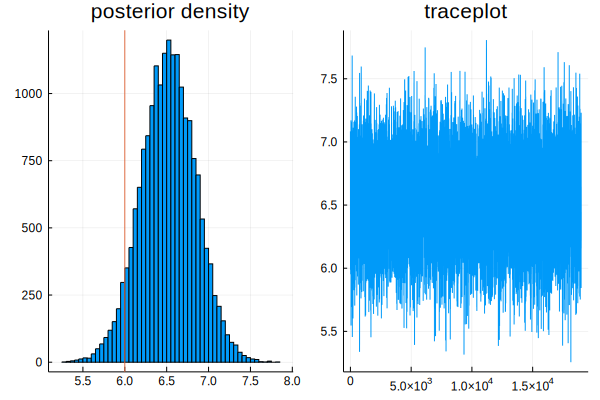

In [39]:
# parameter a
a = ch[:a].value.data[:,:,1]
pl_a = plot_par(a)
vline!([a_true])
display(pl_a)

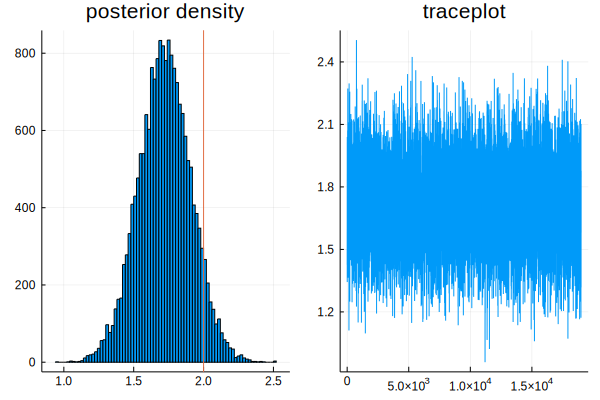

In [40]:
# parameter b
b = ch[:b].value.data[:,:,1]
pl_b = plot_par(b)
vline!([b_true])
display(pl_b)

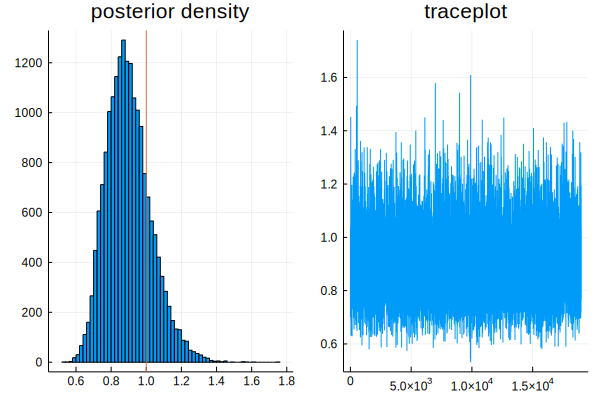

In [42]:
# parameter s
s = ch[:s].value.data[:,:,1]
pl_s = plot_par(s)
vline!([1])
display(pl_s)